In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

G = nx.karate_club_graph()

In [2]:
G.number_of_nodes()

34

In [3]:
G.number_of_edges()

78

In [4]:
# 34 members (nodes), 78 friendships (edges)

In [5]:
nx.is_connected(G)

True

In [6]:
nx.density(G)

0.13903743315508021

In [7]:
# Visualize the network

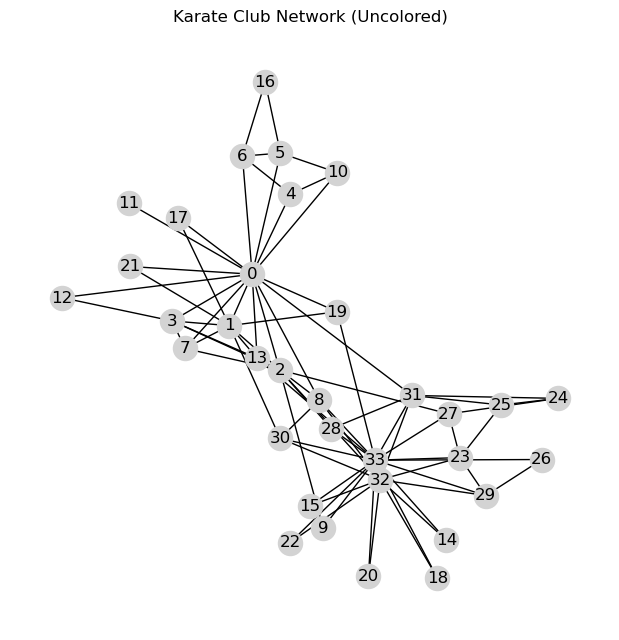

In [8]:
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    node_size=300,
    node_color="lightgray",
    with_labels=True
)
plt.title("Karate Club Network (Uncolored)")
plt.show()

In [9]:
clubs = nx.get_node_attributes(G, "club")
pd.Series(clubs).value_counts()

Mr. Hi     17
Officer    17
Name: count, dtype: int64

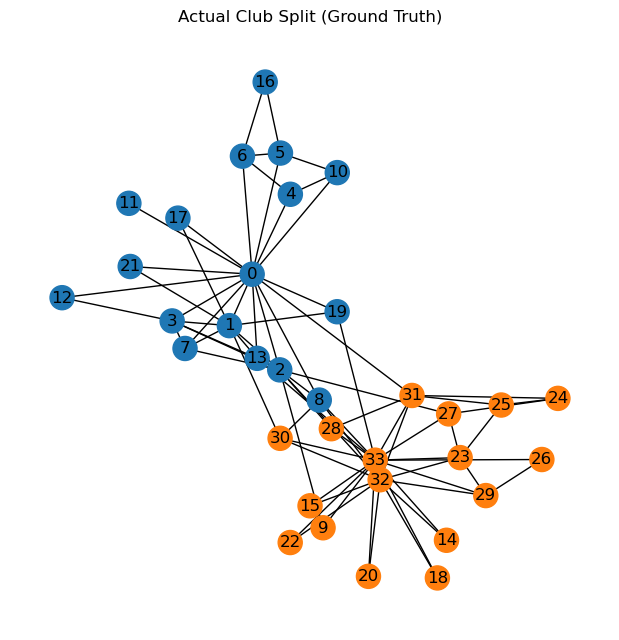

In [10]:
color_map = ["tab:blue" if clubs[n] == "Mr. Hi" else "tab:orange" for n in G.nodes()]

plt.figure(figsize=(6,6))
nx.draw(
    G, pos,
    node_color=color_map,
    node_size=300,
    with_labels=True
)
plt.title("Actual Club Split (Ground Truth)")
plt.show()

In [11]:
# Degree (popularity)

In [12]:
deg = dict(G.degree())
pd.Series(deg).sort_values(ascending=False).head()

33    17
0     16
32    12
2     10
1      9
dtype: int64

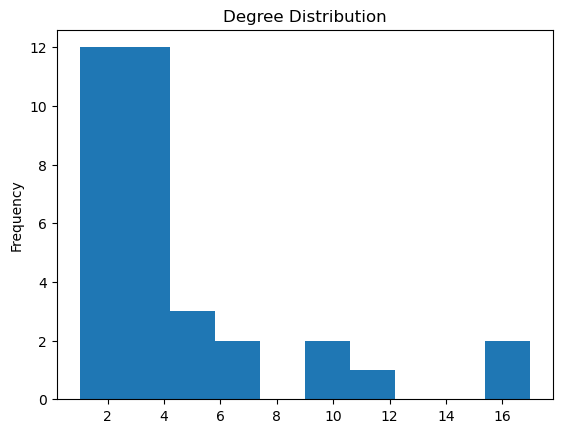

In [13]:
pd.Series(deg).plot(kind="hist", bins=10, title="Degree Distribution")
plt.show()

In [14]:
# Betweenness (brokers / bridges)

In [15]:
bet = nx.betweenness_centrality(G)
pd.Series(bet).sort_values(ascending=False).head()

0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
dtype: float64

In [16]:
# Eigenvector centrality (influence)

In [17]:
eig = nx.eigenvector_centrality(G)
pd.Series(eig).sort_values(ascending=False).head()

33    0.373371
0     0.355483
2     0.317189
32    0.308651
1     0.265954
dtype: float64

In [18]:
# Structure predicts outcome (without attributes)
# Community detection (unsupervised)
# Girvan–Newman (edge-betweenness)

In [19]:
from networkx.algorithms.community import girvan_newman

communities = next(girvan_newman(G))
comm_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        comm_map[node] = i

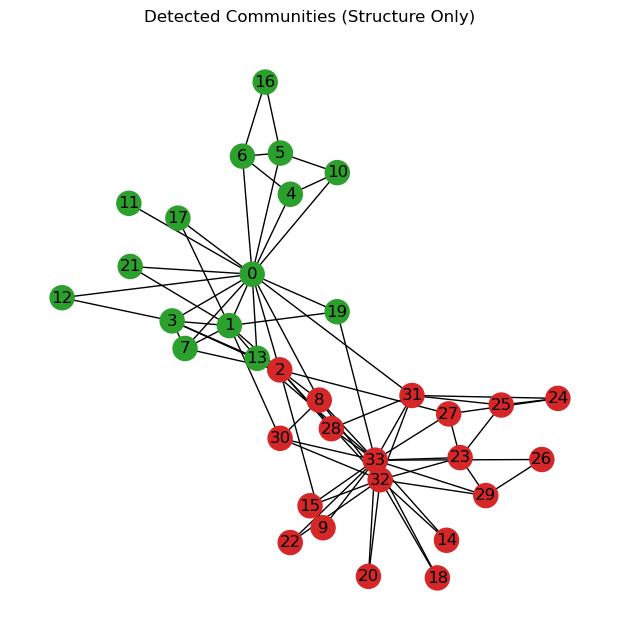

In [20]:
comm_colors = ["tab:green" if comm_map[n] == 0 else "tab:red" for n in G.nodes()]

plt.figure(figsize=(6,6))
nx.draw(
    G, pos,
    node_color=comm_colors,
    node_size=300,
    with_labels=True
)
plt.title("Detected Communities (Structure Only)")
plt.show()

In [21]:
# Quantify alignment

In [22]:
df = pd.DataFrame({
    "node": list(G.nodes()),
    "club": [clubs[n] for n in G.nodes()],
    "community": [comm_map[n] for n in G.nodes()],
    "degree": [deg[n] for n in G.nodes()],
    "betweenness": [bet[n] for n in G.nodes()]
})

In [23]:
pd.crosstab(df["club"], df["community"])

community,0,1
club,,
Mr. Hi,15,2
Officer,0,17


In [24]:
# Distance from leaders

In [25]:
leaders = [n for n in G.nodes() if G.nodes[n]["club"] in ["Mr. Hi", "Officer"]]
leaders[:5]

[0, 1, 2, 3, 4]

In [26]:
# two main leaders (by degree)

In [27]:
leader_nodes = pd.Series(deg).sort_values(ascending=False).index[:2]
leader_nodes

Index([33, 0], dtype='int64')

In [28]:
for leader in leader_nodes:
    df[f"dist_to_{leader}"] = nx.single_source_shortest_path_length(G, leader).values()

#### In the Karate Club network, group division emerges directly from relational structure. 

#### Without using individual attributes, demographics, or behavior, simple network topology—particularly community structure and proximity to central figures—closely predicts the eventual split. 

#### This demonstrates that social outcomes can be strongly shaped by interaction patterns alone, with conflict arising from position within a network rather than personal characteristics.